# Introduction to NLP Fundementals

NLP has the goal of deriving information out of natural language (could be sequences text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

## Check for GPU

In [3]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-06221764-48d3-8d7e-eee7-f83b229141a5)


In [4]:
## Get helper functions from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2021-11-15 13:09:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-15 13:09:43 (74.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

The dataset we are going to be using is kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

See the original source here: https://www.kaggle.com/c/nlp-getting-started

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# unzip data
unzip_data("nlp_getting_started.zip")

--2021-11-15 13:09:45--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-11-15 13:09:45 (101 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in, one way to do so  would be to use Python: https://realpython.com/read-write-files-python/

But I prefer to get visual straight away.

So, another way to do this is using Pandas.

In [6]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# What does test data frame looks like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df) - 5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Did I drink too much? Am I losing touch? Did I build a ship to wreck?

---

Target: 0 (not real disaster)
Text:
Police expand search for missing pregnant woman in Beloeil: Police in Richelieu-Saint-Laurent are expanding th... http://t.co/hMuyzmv8qH

---

Target: 1 (real disaster)
Text:
An outbreak of Legionnaires' disease in New York has killed at least 8 people ÛÓ now officials think they've fo... http://t.co/7evyeLW4LC

---

Target: 0 (not real disaster)
Text:
Enter the world of extreme diving ÛÓ 9 stories up and into the Volga River http://t.co/7adqV1gRVR

---

Target: 0 (not real disaster)
Text:
Mr. T stopped wearing gold chains in 2005 because he thought it would be an insult to the people who lost everything after Hurricane Katrina

---



### Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,  # use 10% of training data for validation split
                                                                            random_state=42)

In [14]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels) 

(6851, 6851, 762, 762)

In [15]:
# Cheeck the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

When dealing with a text problem, one of the first things wou'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or character) to number
* Embedding - create a matrix of feature vector for each token (the  size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None,  # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,  # Create groups of n words
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None)  # how long do you want your sequences to be)

In [17]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
# Setup text vectorization variables
max_vocab_length = 10000  # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,  # how many words in the vocabulary (automatically add <OOV>)
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=max_length)  # how long do you want your sequences to be)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
# Choose a random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 @RAYCHIELOVESU On the block we hear sirens&amp; stories of kids getting Lemonade only to see their life get minute made. we talking semi paid      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[9337,   11,    2, 1549,   46,  684, 8480, 1172,    6,  573,  209,
           1,  126,    5,   99]])>

In [22]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all the unique words in our training data
top_5_words = words_in_vocab[:5]  # get the most common words
bottom_5_words = words_in_vocab[-5:]  # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least comon words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least comon words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding layer

To make our embedding, we're going to use TensorFlow's embedding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [23]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,  # set the input shape
                             output_dim = 128,  # output shape
                             embeddings_initializer="uniform",
                             input_length=max_length  # how long is each input
                             )

embedding

In [24]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence} \
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 [Jax(MK2)] Stage Fatality:UUD+LK (Close)         

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00381092,  0.03243092,  0.04129322, ..., -0.01220999,
          0.03927057, -0.04735548],
        [ 0.03110098,  0.03563196, -0.01865891, ...,  0.04343868,
          0.01666732,  0.01057909],
        [ 0.00381092,  0.03243092,  0.04129322, ..., -0.01220999,
          0.03927057, -0.04735548],
        ...,
        [-0.0452816 ,  0.04016448, -0.00283588, ...,  0.02750378,
          0.02701677,  0.04658217],
        [-0.0452816 ,  0.04016448, -0.00283588, ...,  0.02750378,
          0.02701677,  0.04658217],
        [-0.0452816 ,  0.04016448, -0.00283588, ...,  0.02750378,
          0.02701677,  0.04658217]]], dtype=float32)>

In [25]:
# Check out a single tokens embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00381092,  0.03243092,  0.04129322, -0.02860317,  0.01489017,
        -0.0107004 , -0.00999855,  0.00219028, -0.04089532, -0.02263336,
        -0.04352074, -0.04009819,  0.02342454,  0.00478386,  0.02914963,
        -0.00191321,  0.00358417, -0.04836839,  0.0325377 ,  0.04396391,
         0.03103708, -0.02111561,  0.03539922, -0.03740489,  0.04604441,
         0.02680707, -0.04603208, -0.00537141,  0.03901465, -0.02567453,
         0.02653943,  0.04252673,  0.04739592,  0.0387325 ,  0.03176198,
         0.04557294, -0.03617536,  0.01105507,  0.04954011,  0.03337005,
        -0.01601331,  0.00552117, -0.01139329,  0.04909214, -0.00520103,
         0.03840901,  0.00309901,  0.02862829,  0.0025895 , -0.02636516,
         0.03910864, -0.03625961,  0.02094003, -0.02847647,  0.03550143,
         0.04396692,  0.00284183,  0.03194529,  0.01765947,  0.04210656,
        -0.0018664 ,  0.00440159, -0.03947011,  0.02995903, -0.0438288 ,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from Sklear ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Model 1: Feed-Forward Neural Network (dense model)
* Model 2: LSTM Model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

How are we going to approach all of these?

Use the standard steps in modelling with TensorFLow#

* Create a model
* Build a model
* Fit a model
* Evaluate our model

### Model 0: Getting a baseline

As with all machine learning modelling experiment, it is important to create a baseline model so you've got a benchmar for future experiments to build upon.

To create our baseline, we'll use sklearn's Multinomial Naive Bayes using the TF-IDF formular to convert our words to numbers.

> 🔑 **Note:** It's common practice to use non-DL algorithms as baseline because of their speed and later using DL to see if you can improve upon them.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB())  # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves a scroe of: {baseline_score*100:.2f}")

Our baseline model achieves a scroe of: 79.27


In [28]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate our model's predictions with different metrics every time, however, this willbe cumbersome and could easily be fixed with a function.

Let's create one to compare our model's prediction using truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score 

In [29]:
# Function to evaluate: accuracy,precision, recall and f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1-score using weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [30]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: Feed-Forward Neural Network (dense model)

In [31]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save tensorflow logs
SAVE_DIR = "model_logs"

In [32]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [33]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [34]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20211115-130953
Epoch 1/5
215/215 [==============================] - 5s 8ms/step - loss: 0.6097 - accuracy: 0.6954 - val_loss: 0.5369 - val_accuracy: 0.7454
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4402 - accuracy: 0.8175 - val_loss: 0.4675 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3454 - accuracy: 0.8584 - val_loss: 0.4607 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2831 - accuracy: 0.8918 - val_loss: 0.4658 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2369 - accuracy: 0.9127 - val_loss: 0.4833 - val_accuracy: 0.7887


In [36]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.7887


[0.4833071529865265, 0.7887139320373535]

In [37]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [38]:
# Look at a single prediction
model_1_pred_probs[0]

array([0.3531098], dtype=float32)

In [39]:
# Look at first 10 predictions
model_1_pred_probs[:10]

array([[0.3531098 ],
       [0.76771265],
       [0.99722713],
       [0.09336488],
       [0.117157  ],
       [0.9315556 ],
       [0.9107082 ],
       [0.99243706],
       [0.9621432 ],
       [0.22584191]], dtype=float32)

In [40]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [41]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'f1': 0.7855210885289512,
 'precision': 0.7943691525527891,
 'recall': 0.7887139107611548}

In [42]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [43]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [44]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [45]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)  # same size as vocab size and embedding dim (output_dim of our embedding layer)

(10000, 128)


Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: https://projector.tensorflow.org/

And TensorFlow also has an incredible guide on word embeddings themselves: https://www.tensorflow.org/text/guide/word_embeddings

In [46]:
# # Create embedding files (we got this from TensorFlow's word embeddings documentation)
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [47]:
#  # Download files from colab to projector
#  try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the respresentation of a previous input to aid the representation of  a later input.

> **📖 Resources:**If you want an overview of the internals of a recurrent neural network, see the following:
- MIT's sequence modelling lecture https://youtu.be/qjrad0V0uJE
- Chris Olah's intro to LSTMs: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- Andrej Karpathy's http://karpathy.github.io/2015/05/21/rnn-effectiveness/

### Model 2: LSTM

LSTM = Long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this#

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [48]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.LSTM(units=64, return_sequences=True)(x) # when you're stacking RNN cells togather, you need to return_seqeunces=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [49]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [50]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211115-131005
Epoch 1/5
215/215 [==============================] - 11s 20ms/step - loss: 0.2214 - accuracy: 0.9266 - val_loss: 0.5061 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1585 - accuracy: 0.9428 - val_loss: 0.5767 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1290 - accuracy: 0.9529 - val_loss: 0.6993 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1074 - accuracy: 0.9604 - val_loss: 0.7988 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0872 - accuracy: 0.9648 - val_loss: 1.0154 - val_accuracy: 0.7795


In [51]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.3559477e-02],
       [7.9249501e-01],
       [9.9997020e-01],
       [1.7130667e-01],
       [7.5704220e-04],
       [9.9980634e-01],
       [9.9387819e-01],
       [9.9998641e-01],
       [9.9996352e-01],
       [7.6371282e-01]], dtype=float32)

In [52]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [53]:
# Calculate model_2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.95275590551181,
 'f1': 0.7790235518023306,
 'precision': 0.779213392666068,
 'recall': 0.7795275590551181}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [54]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.GRU(64, return_sequences=True)(x)  # if you're stacking RNN cells togather, you need to return_seqeunces=True
# x = layers.LSTM(42, return_sequences=True)(x)
# x = layers.GRU(99)(x)
# x = layers.Dense(64, activation="sigmoid")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [55]:
# Get summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [56]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20211115-131031
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.1616 - accuracy: 0.9350 - val_loss: 0.7582 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0862 - accuracy: 0.9673 - val_loss: 0.7523 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0695 - accuracy: 0.9729 - val_loss: 0.9331 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0611 - accuracy: 0.9752 - val_loss: 0.9435 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0542 - accuracy: 0.9766 - val_loss: 1.0836 - val_accuracy: 0.7782


In [58]:
# Make predictions with LSTM model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[2.5320185e-02],
       [6.9793308e-01],
       [9.9979740e-01],
       [1.0802479e-01],
       [1.7232606e-04],
       [9.9968612e-01],
       [8.7652791e-01],
       [9.9991810e-01],
       [9.9985874e-01],
       [6.8518203e-01]], dtype=float32)

In [59]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [60]:
# Calculate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.82152230971128,
 'f1': 0.7766208088282468,
 'precision': 0.7791991586469295,
 'recall': 0.7782152230971129}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from left to right as well as right to left.

In [61]:
# Build a bidirectional RNN
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs, name="model_4_bidirectional")

In [62]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [63]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [64]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_Bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20211115-131046
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.1076 - accuracy: 0.9650 - val_loss: 1.0892 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0512 - accuracy: 0.9771 - val_loss: 1.1828 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0471 - accuracy: 0.9796 - val_loss: 1.1778 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0499 - accuracy: 0.9783 - val_loss: 1.3340 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0385 - accuracy: 0.9803 - val_loss: 1.4619 - val_accuracy: 0.7493


In [65]:
# Make predictions with LSTM model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[9.2919606e-01],
       [6.9013143e-01],
       [9.9997556e-01],
       [2.3729908e-01],
       [1.8338327e-05],
       [9.9983597e-01],
       [9.8102665e-01],
       [9.9998856e-01],
       [9.9997556e-01],
       [9.8110604e-01]], dtype=float32)

In [66]:
# Convert model 4 pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [67]:
# Calculate model_4 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 74.93438320209974,
 'f1': 0.7485447240178604,
 'precision': 0.7488957031272704,
 'recall': 0.7493438320209974}

## Convolution Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width) ... however, our text data is 1D.

Previously we've used Conv2D but now we are going to use Conv1D.

The typical structure of a Conv1D for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (Class probability)
```

### Model 5: Conv1D

In [68]:
# Test out our embedding layer, Conv1D layer and max pooling layer
embedding_test = embedding(text_vectorizer(["this is a sentence"])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,  # this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        activation="relu",
                        padding="valid")  # default = "valid", the output is smaller than the input shape, "same" means output is same shape as input

conv1d_output = conv_1d(embedding_test) # pass test embedding through conv1D layer
max_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv1d_output) # equivalent to "get the most important one feature" or "get the feature with the highest value"

embedding_test.shape, conv1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [69]:
# embedding_test

In [70]:
# conv1d_output

In [71]:
# max_pool_output

In [72]:
# Create 1-dimension convolutional neural layer to model sequences
from tensorflow.keras import layers
input = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get summary of Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 1)              

In [73]:
# Fit the Conv1D model
model_5.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20211115-131132
Epoch 1/5
215/215 [==============================] - 4s 9ms/step - loss: 0.1242 - accuracy: 0.9596 - val_loss: 0.8996 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0742 - accuracy: 0.9731 - val_loss: 1.0390 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0616 - accuracy: 0.9745 - val_loss: 1.1468 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0554 - accuracy: 0.9788 - val_loss: 1.1832 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0548 - accuracy: 0.9774 - val_loss: 1.1999 - val_accuracy: 0.7598


In [74]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[3.0542126e-01],
       [9.5308864e-01],
       [9.9988937e-01],
       [6.1505888e-02],
       [5.1331818e-07],
       [9.9329245e-01],
       [9.7772938e-01],
       [9.9998033e-01],
       [9.9999928e-01],
       [7.0028532e-01]], dtype=float32)

In [75]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [76]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.98425196850394,
 'f1': 0.7586850461611226,
 'precision': 0.7597625353264251,
 'recall': 0.7598425196850394}

In [77]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP. specifically using TensorFlow Hub's Universal Entence Encoder https://tfhub.dev/google/universal-sentence-encoder/4

See how the USE was created here: https://arxiv.org/abs/1803.11175

In [78]:
sample_sentence

"There's a flood in my street!"

In [79]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157024  0.0248591   0.0287805  -0.01271502  0.03971543  0.08827759
  0.02680986  0.05589837 -0.01068731 -0.0059729   0.00639324 -0.01819523
  0.00030817  0.09105891  0.05874644 -0.03180627  0.01512476 -0.05162928
  0.00991369 -0.06865346 -0.04209306  0.0267898   0.03011008  0.00321069
 -0.00337969 -0.04787359  0.02266718 -0.00985924 -0.04063614 -0.01292095
 -0.04666384  0.056303   -0.03949255  0.00517685  0.02495828 -0.07014439
  0.02871508  0.04947682 -0.00633971 -0.08960191  0.02807117 -0.00808362
 -0.01360601  0.05998649 -0.10361786 -0.05195372  0.00232955 -0.02332528
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


In [80]:
embed_samples[0].shape

TensorShape([512])

In [81]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [82]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid", name="output_layer")
], name="Model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get summary
model_6.summary()

Model: "Model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [83]:
# Train a classifier on top of the USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20211115-131208
Epoch 1/5
215/215 [==============================] - 8s 23ms/step - loss: 0.5033 - accuracy: 0.7869 - val_loss: 0.4475 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4147 - accuracy: 0.8145 - val_loss: 0.4394 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4018 - accuracy: 0.8206 - val_loss: 0.4356 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3932 - accuracy: 0.8246 - val_loss: 0.4328 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3859 - accuracy: 0.8272 - val_loss: 0.4290 - val_accuracy: 0.8084


In [84]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.24064587],
       [0.7944369 ],
       [0.98945075],
       [0.20122835],
       [0.7819531 ],
       [0.84364104],
       [0.9845408 ],
       [0.98437   ],
       [0.9602138 ],
       [0.10905415]], dtype=float32)

In [85]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [86]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 80.83989501312337,
 'f1': 0.8077514730278195,
 'precision': 0.8084704501710461,
 'recall': 0.8083989501312336}

In [87]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 7: TF Hub pretrained USE but with 10% of training data

Transfer Learning really helps when you don't have a large dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` excepth we'll train it on 10% of the data.

In [88]:
# ## NOTE: Making data splts likebelow leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

> **🔑 Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model on 10% of data outperforming a same model trained on 100% of data). Trust your gut and go back through to find where the error may lie.

In [90]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [91]:
# Check the number of each label in the new created data
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [94]:
# Check the number of targets in our subset of data
train_sentences_10_percent["target"].value_counts()

IndexError: ignored

To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method. 

In [95]:
# model_7 = tf.keras.models.clone_model(model_6)
# Create model using Sequential API
model_7 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid", name="output_layer")
], name="Model_7_USE")


# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get summary
model_7.summary()

Model: "Model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [96]:
# Train a classifier on top of the USE pretrained embeddings
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20211115-131426
Epoch 1/5
22/22 [==============================] - 3s 72ms/step - loss: 0.6753 - accuracy: 0.6803 - val_loss: 0.6546 - val_accuracy: 0.7375
Epoch 2/5
22/22 [==============================] - 1s 49ms/step - loss: 0.6132 - accuracy: 0.7985 - val_loss: 0.6000 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 1s 49ms/step - loss: 0.5420 - accuracy: 0.8204 - val_loss: 0.5459 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 49ms/step - loss: 0.4784 - accuracy: 0.8307 - val_loss: 0.5108 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 1s 37ms/step - loss: 0.4345 - accuracy: 0.8307 - val_loss: 0.4926 - val_accuracy: 0.7756


In [97]:
# Make predictions with 10% USE TF Hub model
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.23620038],
       [0.6091783 ],
       [0.90677017],
       [0.38610035],
       [0.5586967 ],
       [0.6852183 ],
       [0.86610276],
       [0.79553217],
       [0.83122355],
       [0.15478541]], dtype=float32)

In [98]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [99]:
# Calculate model 6 performance metrics
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.55905511811024,
 'f1': 0.7739772681043204,
 'precision': 0.7765218346613636,
 'recall': 0.7755905511811023}

In [100]:
model_6_results

{'accuracy': 80.83989501312337,
 'f1': 0.8077514730278195,
 'precision': 0.8084704501710461,
 'recall': 0.8083989501312336}

## Comparing the performance of each our models

In [101]:
# Combine model results into a dataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                 "1_simple_dense": model_1_results,
                                 "2_LSTM": model_2_results,
                                 "3_GRU": model_3_results,
                                 "4_Bidirectional": model_4_results,
                                 "5_CONV1D": model_5_results,
                                 "6_TF_HUB_USE_Encoder": model_6_results,
                                 "7_TF_HUB_USE_Encoder_on_10%_of_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.871391,0.794369,0.788714,0.785521
2_LSTM,77.952756,0.779213,0.779528,0.779024
3_GRU,77.821522,0.779199,0.778215,0.776621
4_Bidirectional,74.934383,0.748896,0.749344,0.748545
5_CONV1D,75.984252,0.759763,0.759843,0.758685
6_TF_HUB_USE_Encoder,80.839895,0.808470,0.808399,0.807751
7_TF_HUB_USE_Encoder_on_10%_of_data,77.559055,0.776522,0.775591,0.773977


In [102]:
# # Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.788714,0.794369,0.788714,0.785521
2_LSTM,0.779528,0.779213,0.779528,0.779024
3_GRU,0.778215,0.779199,0.778215,0.776621
4_Bidirectional,0.749344,0.748896,0.749344,0.748545
5_CONV1D,0.759843,0.759763,0.759843,0.758685
6_TF_HUB_USE_Encoder,0.808399,0.808470,0.808399,0.807751
7_TF_HUB_USE_Encoder_on_10%_of_data,0.775591,0.776522,0.775591,0.773977


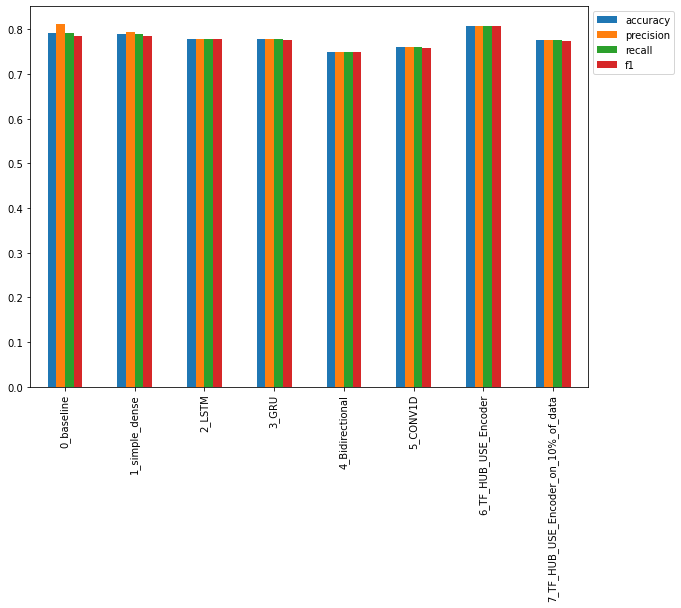

In [103]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

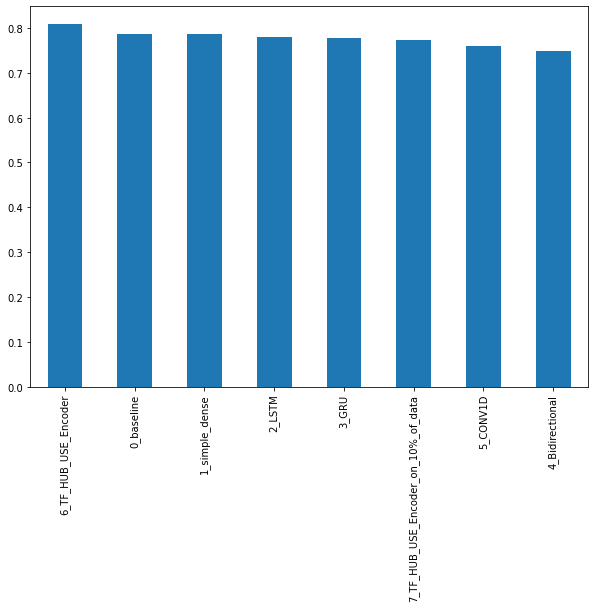

In [104]:
# Sort the model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

## Uploading our model training logs to TensorBoard.dev


In [ ]:
# View TensorBoad logs of transfer learning modelling experiments (plus all of our other models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modeling Experiments" \
  --description "Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset" \
  --one_shot # exit the uploader once uploading is finished

## Saving and loading trained model

There are two main formats to save a model to in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)


In [106]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [107]:
# Load model with custom hub layer (required HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [108]:
# How does our loaded model perform
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4290 - accuracy: 0.8084


[0.4289577901363373, 0.808398962020874]

Now let's save to the `SavedModel` formate ...

In [109]:
# Save TF Hub Sentence Encoder SavedModel to model format (default)
model_6.save("model_6.model")

INFO:tensorflow:Assets written to: model_6.model/assets


INFO:tensorflow:Assets written to: model_6.model/assets


In [110]:
# Load model with custom hub layer (required HDF5 format)
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6.model")

In [111]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4290 - accuracy: 0.8084


[0.4289577901363373, 0.808398962020874]

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which one is it getting *most* wrong (those with prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice versa.

In [112]:
# Download a pretrained model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2021-11-15 13:15:23--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  42.5MB/s    in 8.7s    

2021-11-15 13:15:32 (105 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.ind

In [113]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [114]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should in label format

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [115]:
# Create DataFrame with validation sentences and best performing model predictions labels and probabilities
val_df = pd.DataFrame({"text": val_sentences,
                      "target": val_labels,
                      "pred": model_6_pretrained_preds,
                      "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [116]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob",ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


Let's remind ourselves of the target labels
* 0 = not disaster
* 1 = disaster

In [117]:
most_wrong.tail() # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [118]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769819736480713
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.8148158192634583
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

---

In [119]:
# Check the false negatves (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054596975445747375
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.

## Making predictions on the test dataset

In [120]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model except single sentence
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

Pred: 0, Prob: 0.4940234422683716
Text:
@Statoilasa &amp; @TOTAL make significant discovery in the North Sea: Visualise the full potential on our seismic     #g http://t.co/ve2eBqm21B

-----

Pred: 0, Prob: 0.029834754765033722
Text:
@OrianaArzola does he not have any manners or something? Jfc. You have all the rights to be mad! But hey try not to let this ruin your day

-----

Pred: 0, Prob: 0.03458905220031738
Text:
@_Souuul * gains super powers im now lava girl throws you ina chest wrapped in chains &amp; sinks you down the the bottom of the ocean*

-----

Pred: 0, Prob: 0.1994980275630951
Text:
@spikepoint @skie It's about context too. If his dick slipped out during the super bowl people would be throwing hellfire here.

-----

Pred: 0, Prob: 0.09474166482686996
Text:
Warcraft 3-Inspired Mode Likely Hitting Heroes of the Storm http://t.co/848CVWWdOt

-----

Pred: 1, Prob: 0.9639574289321899
Text:
Families to sue over Legionnaires: More than 40 families affected by the fatal outbrea

## The speed/score tradeoff

In [121]:
# Let's make a function to measuere the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples
  """
  start_time = time.perf_counter()  # get start time
  model.predict(samples)  # make predictions
  end_time = time.perf_counter()  # get finish time
  total_time = end_time-start_time  # calculate how long predictions took to make prediction
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [122]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.3998279970001022, 0.000524708657480449)

In [124]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)

In [125]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)

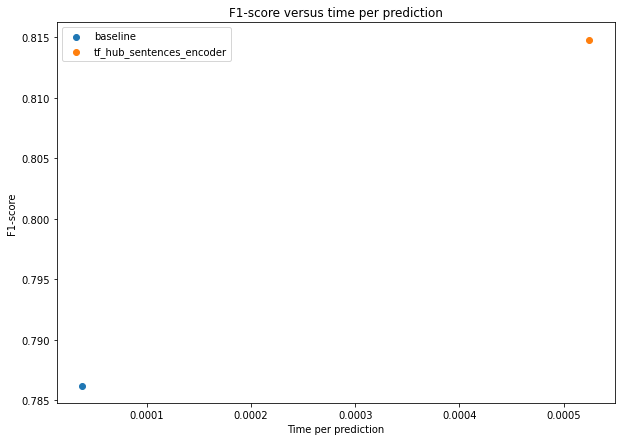

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentences_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");